### In this notebook we go through the process of training our model

We'll start by loading our data and encoding our categorical variables,  
since in our EDA process we saw that our data contains many unique values,  
it's best to use label encoding over one-hot encoding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#from sklearn.preprocessing import LabelEncoder

#artist_enc = LabelEncoder()
#genre_enc = LabelEncoder()

ag_df = pd.read_csv('data/ag_data.csv')
ag_df.head()

,Artist,Subgenre
0,Jason Mraz,acoustic pop
1,Jason Mraz,dance pop
2,Jason Mraz,neo mellow
3,Jason Mraz,pop
4,The Paper Kites,acoustic pop


In [2]:
ag_df2 = ag_df[~(ag_df['Subgenre'].str.contains('sleep'))].copy()
#ag_df2['Artist'] = artist_enc.fit_transform(ag_df2['Artist'])
#ag_df2['Subgenre'] = genre_enc.fit_transform(ag_df2['Subgenre'])

ag_df2.head()

,Artist,Subgenre
0,Jason Mraz,acoustic pop
1,Jason Mraz,dance pop
2,Jason Mraz,neo mellow
3,Jason Mraz,pop
4,The Paper Kites,acoustic pop


In [3]:
ag_df.shape

(83983, 2)

Now that our data is preprocessed we can begin with training our model,   
we're going to opt for K-Modes since we're dealing with categorical data,  
to choose the optimal amount of clusters we'll take a look at the elbow method

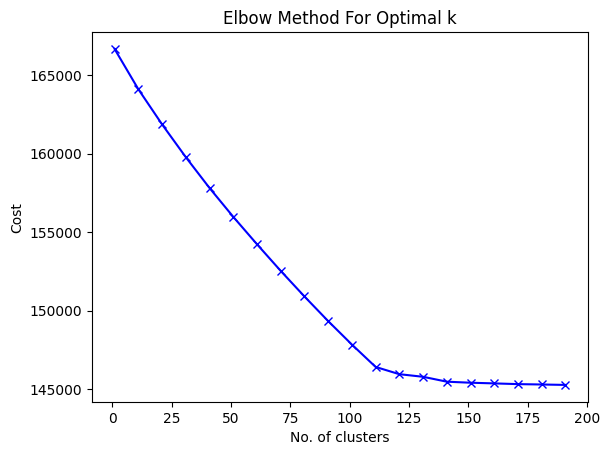

In [14]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

cost = []
K = range(1,200,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters)
    kmode.fit_predict(ag_df2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

We'll opt for 150 as our number of clusters

In [37]:
km_model = KModes(n_clusters=150)
km_model.fit(ag_df2)

KModes(n_clusters=150, n_init=1)

In [38]:
km_model.cluster_centroids_

array([['Boris', 'mandopop'],
       ['Allman Brothers Band', 'rock'],
       ['Wizkid', 'afrobeats'],
       ['Lu Han', 'k-pop'],
       ['Cali Y El Dandee', 'urbano latino'],
       ['BaianaSystem', 'nova mpb'],
       ['Silverstein', 'metalcore'],
       ['CID', 'progressive house'],
       ['Orquesta Aragón', 'salsa'],
       ['Seven Lions', 'electro house'],
       ['Showtek', 'euphoric hardstyle'],
       ['The Moody Blues', 'singer-songwriter'],
       ['Au5', 'dubstep'],
       ['Sepultura', 'hard rock'],
       ['Calle 13', 'reggaeton'],
       ['William So', 'cantopop'],
       ['Inimigos Da HP', 'pagode novo'],
       ['Tommy Campbell', 'new comedy'],
       ['Rage Against The Machine', 'alternative metal'],
       ['Chuck Fenda', 'dancehall'],
       ['Luciano Pavarotti', 'opera'],
       ['Ivete Sangalo', 'sertanejo universitario'],
       ['The Byrds', 'classic rock'],
       ['Laidback Luke', 'progressive electro house'],
       ['In Flames', 'melodic metalcore'],
      

array([ 3, 99, 14], dtype=uint16)